# Day 10

## Part 1

- I'm a mean green screen fixing machine!
- the CPU has a single register, X
- there are 2 commands:
    - `noop`: takes 1 cycle, does nothing
    - `addx <V>`: takes 2 cycles, adds V to the value in X after 2 cycles and is blocking

`Find the signal strength during the 20th, 60th, 100th, 140th, 180th, and 220th cycles. What is the sum of these six signal strengths?`

In [15]:
from matplotlib import pyplot as plt
from utils import parse_from_file, ParseConfig

parser = ParseConfig('\n', ParseConfig(' ', [str, int]))

commands = parse_from_file('day_10.txt', parser)

print(f'the first few commands are: {commands[:10]}')

the first few commands are: [['noop'], ['noop'], ['addx', 5], ['addx', 3], ['addx', -2], ['noop'], ['addx', 5], ['addx', 4], ['noop'], ['addx', 3]]


In [39]:
def run_commands(commands: list[list]) -> list[int]:
    """
    returns the value stored in the x buffer at each cycle
    """
    X_buffer = [1]

    for command in commands:
        X_buffer.append(X_buffer[-1])
        if command[0] == 'noop':
            pass
        else:
            _, V = command
            X_buffer.append(X_buffer[-1] + V)
    
    return X_buffer

test_commands = [
    ['noop'],
    ['addx', 3],
    ['addx', -5],
]

test_buf = run_commands(test_commands)

print('\n'.join([str(item) for item in enumerate(test_buf, 1)]))

(1, 1)
(2, 1)
(3, 1)
(4, 4)
(5, 4)
(6, -1)


Text(0.5, 0, 'cycle count')

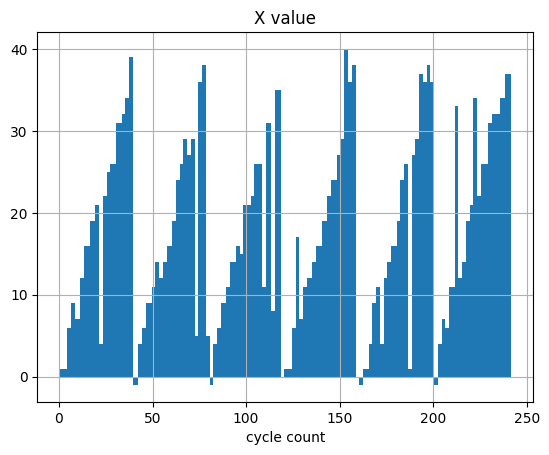

In [40]:
X_buffer = run_commands(commands)
cycle_count = range(1, len(X_buffer) + 1)

fig, ax = plt.subplots()
ax.bar(cycle_count, X_buffer, width=1)
ax.grid('ON')
ax.set_title('X value')
ax.set_xlabel('cycle count')

In [43]:
signal_strength = sum([
    value * cycle for cycle, value in zip(cycle_count, X_buffer)
    if cycle in (20, 60, 100, 140, 180, 220)
])

print(
    'the sum of the signal strengths cycle 20 and then every 40th cycle after '
    f'that is: {signal_strength}!')

the sum of the signal strengths cycle 20 and then every 40th cycle after that is: 13220!
